# Laboratorio 03 - Ejercicio 02
CC3039, Modelación y Simulación

Integrantes:
- Ricardo Méndez, 21289
- Sara Echeverría, 21371
- Melissa Pérez, 21385

## 2.1. Crecimiento poblacional
Considere el modelo de crecimiento logístico dado por la ecuación diferencial:

$$\frac{dP}{dt} = rP \left(1 - \frac{P}{K}\right)$$

Donde: \( P \) es la población en el tiempo \( t \), \( r \) es el ratio de crecimiento, \( K \) es la capacidad de carga.

Dado:
- Población inicial \( P0 = 10 \)
- Ratio de crecimiento \( r = 0.1 \)
- Capacidad de carga \( K = 1,000 \)
- Paso del tiempo \( h = 0.1 \)
- Tiempo total \( T = 20 \)

Use el método de 4to orden de Runge-Kutta para estimar la población sobre el tiempo y grafique los resultados.

**Interprete la gráfica y responda ¿cuál es el estimado de la población en tiempo  \( T = 20 \)?**

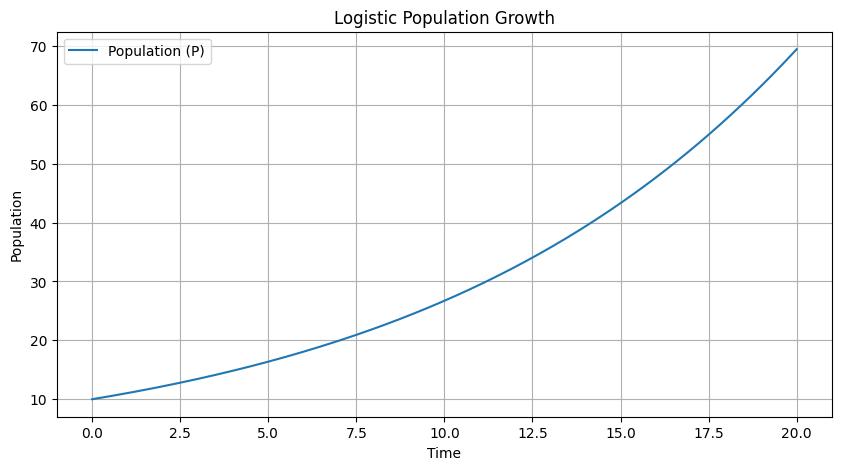

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# given parameters
initialPopulation = 10
growthRate = 0.1     
carryingCapacity = 1000
timeStep = 0.1          
totalTime = 20          

# function for the rate of change of the population
def logisticGrowth(population, growthRate, carryingCapacity):
    return growthRate * population * (1 - population / carryingCapacity)

# fourth-order Runge-Kutta method
def rungeKutta4th(initialPopulation, growthRate, carryingCapacity, timeStep, totalTime):
    times = np.arange(0, totalTime + timeStep, timeStep)
    populations = np.zeros(len(times))
    populations[0] = initialPopulation
    for i in range(1, len(times)):
        k1 = logisticGrowth(populations[i-1], growthRate, carryingCapacity)
        k2 = logisticGrowth(populations[i-1] + 0.5 * timeStep * k1, growthRate, carryingCapacity)
        k3 = logisticGrowth(populations[i-1] + 0.5 * timeStep * k2, growthRate, carryingCapacity)
        k4 = logisticGrowth(populations[i-1] + timeStep * k3, growthRate, carryingCapacity)
        populations[i] = populations[i-1] + (timeStep / 6) * (k1 + 2 * k2 + 2 * k3 + k4)
    return times, populations

# get the time and population values
times, populations = rungeKutta4th(initialPopulation, growthRate, carryingCapacity, timeStep, totalTime)

# plot the results
plt.figure(figsize=(10, 5))
plt.plot(times, populations, label='Population (P)')
plt.title('Logistic Population Growth')
plt.xlabel('Time')
plt.ylabel('Population')
plt.legend()
plt.grid(True)
plt.show()

La gráfica muestra el crecimiento logístico de una población a lo largo del tiempo, comenzando con 10 individuos y aumentando progresivamente. El crecimiento es rápido al inicio y se desacelera al acercarse a la capacidad máxima de 1000 individuos. Para \( T = 20 \), el modelo estima una población de aproximadamente 70 individuos. Esto indica que la población podría seguir creciendo si se extendiera el tiempo del modelo.

## 2.2. Depredador - Presa
Considere el modelo de depredador-presa de Lotka-Volterra, dado por las siguientes ecuaciones diferenciales:

$$\frac{dR}{dt} = \alpha R - \beta RP$$
$$\frac{dP}{dt} = \delta RP - \gamma P$$

**Dado:**
- Población inicial de la presa \( R_0 = 40 \)
- Población inicial de los depredadores \( P_0 = 9 \)
- Ratio de crecimiento natural de la presa \( \alpha = 0.1 \)
- Coeficiente del ratio de depredación \( \beta = 0.02 \)
- Ratio de reproducción de los depredadores por presa comida \( \delta = 0.01 \)
- Ratio de muerte de los depredadores \( \gamma = 0.1 \)
- Paso de tiempo \( h = 0.1 \)
- Tiempo total \( T = 50 \)

Utilice el método de cuarto orden de Runge-Kutta para estimar las poblaciones a lo largo del tiempo y trazar el resultado. Interprete las gráficas y responda:

**¿Cuál es el estimado de las poblaciones en tiempo \( T = 50 \)?**